Este colab fue desarrollado por Arnold Charry Armero.

# Redes Neuronales Convolucionales (CNN)

Las Redes Neuronales Convolucionales (CNN) son un tipo de red neuronal profunda diseñada específicamente para procesar datos con una estructura de cuadrícula, como imágenes, vídeos o mapas de características. Estas redes se basan en los principios de las Redes Neuronales Artificiales (ANN), pero incorporan nuevas operaciones y capas que les permiten detectar patrones espaciales y jerárquicos de manera más eficiente y precisa. El procesamiento de una imagen en una CNN se puede dividir en varias etapas principales:

1. Convolución:
En esta primera fase, la red recibe la imagen en formato de píxeles y aplica sobre ella filtros o kernels, que son pequeñas matrices que recorren la imagen extrayendo patrones locales como bordes, texturas o formas. El resultado de esta operación es un mapa de características, el cual contiene información relevante sobre los patrones detectados en diferentes regiones de la imagen. A medida que la red avanza en profundidad, aprende características cada vez más complejas y abstractas. Matemáticamente, la operación de convolución entre una imagen \(I\) y un filtro \(K\) se expresa como:

$$
C(i, j) = \sum_m \sum_n I(i + m, j + n) \, K(m, n)
$$

Donde:
- $I(i + m, j + n)$ representa el valor del píxel en la posición $(i + m, j + n)$,
- $K(m, n)$ representa el valor del filtro en la posición $(m, n)$,
- $C(i, j)$ es el valor resultante en el mapa de características.

2. Pooling:
Después de la convolución, se aplica una capa de pooling para reducir la dimensión espacial de los mapas de características. Este proceso consiste en dividir la imagen en regiones pequeñas y reemplazarlas por un único valor representativo, generalmente el máximo (max pooling) o el promedio (average pooling). Esto permite reducir la cantidad de parámetros, mejorar la eficiencia computacional y mantener solo la información más importante, lo que también ayuda a evitar el sobreajuste. Por ejemplo, en max pooling el resultado $P$ sobre una región $\Omega$ se define como:

$$P = \max_{(i,j) \in \Omega} C(i, j)$$


3. Flattening:
Una vez que la red ha extraído y resumido las características, la matriz resultante se convierte en un vector unidimensional mediante el proceso de flattening. Este vector sirve como entrada para las capas totalmente conectadas (fully connected) de la red, donde se realiza el proceso de clasificación final.

A partir de aquí, la arquitectura sigue la estructura tradicional de una red neuronal:

*   Capa de entrada: recibe el vector con las características extraídas.
*   Capas ocultas: realizan combinaciones no lineales de dichas características para aprender relaciones complejas.
*   Capa de salida: produce la predicción final.

En tareas de clasificación de imágenes, la capa de salida suele utilizar la función de activación Softmax, que transforma los valores de salida en probabilidades normalizadas que suman 1, facilitando así la interpretación de la predicción. Esto matemáticamente se define de la siguiente manera,

$$\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

donde:
- $z_i$ es la salida del perceptrón correspondiente a la clase $i$,
- $K$ es el número total de clases.

Para entrenar la red, comúnmente se emplea la función de pérdida de entropía cruzada (cross-entropy loss), ya que mide con precisión la diferencia entre las distribuciones de probabilidad reales y las predichas, incentivando al optimizador a ajustar los pesos de manera más eficiente. Matemáticamente se define de la siguiente manera,

$$
L = - \sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$

Ahora se continúa con la implementación en código,

In [ ]:
# Se importan las librerias
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## Procesamiento de Imágenes

Primero se procesan las imágenes por medio de la libreria de Keras,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se procesan las imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Se definen rutas
train_path = '/content/drive/MyDrive/Machine Learning/Bases de Datos/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/Bases de Datos/dataset/test_set'

# Generador de Entrenamiento
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset = 'training')

# Generador de Validación
validation_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Generador de Test
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Entrenamiento el Modelo

Se entrena el modelo con varias capas de convolución y max pooling, para después hacer flattening y pasar los valores a la Red Neuronal Convolucional (CNN).

In [ ]:
# Inicializamos la red neuronal
classifier = Sequential()
classifier.add(Input(shape=(64, 64, 3)))

In [ ]:
# Paso 1 - Convolución
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"))

In [ ]:
# Paso 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Paso 3 - Convolución Segunda Capa
classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"))

In [ ]:
# Paso 4- Max Pooling Segunda Capa
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Paso 5 - Flattening
classifier.add(Flatten())

In [ ]:
# Paso 6 - Full Connection
classifier.add(Dense(units = 128, activation = "relu"))

# Paso 7 - Capa de salida con Softmax (2 clases)
classifier.add(Dense(units=2, activation='softmax'))

In [ ]:
# Compilar la Red Neuronal de Convolución (CNN)
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
classifier.fit(train_set, epochs=20, validation_data=validation_set)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1006s 4s/step - accuracy: 0.5477 - loss: 0.6903 - val_accuracy: 0.6675 - val_loss: 0.6365
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 406ms/step - accuracy: 0.6741 - loss: 0.6022 - val_accuracy: 0.6812 - val_loss: 0.5822
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 403ms/step - accuracy: 0.7007 - loss: 0.5692 - val_accuracy: 0.7419 - val_loss: 0.5214
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 88s 439ms/step - accuracy: 0.7445 - loss: 0.5181 - val_accuracy: 0.7344 - val_loss: 0.5169
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 400ms/step - accuracy: 0.7552 - loss: 0.5012 - val_accuracy: 0.7525 - val_loss: 0.4990
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 393ms/step - accuracy: 0.7755 - loss: 0.4659 - val_accuracy: 0.7575 - val_loss: 0.4900
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 400ms/step - accuracy: 0.7846 - loss: 0.4505 - val_accuracy: 0.7806 - val_loss: 0.4672
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 394ms/step - accuracy: 0.7932 - loss: 0.

In [ ]:
loss, acc = classifier.evaluate(test_set)
print(f"Precisión final en datos nuevos: {acc*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 399s 6s/step - accuracy: 0.8019 - loss: 0.4699
Precisión final en datos nuevos: 79.80%


In [ ]:
# Predicciones en forma de Softmax
y_pred = classifier.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
# Se obtienen los valores de las etiquetas
y_test = test_set.classes

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step


## Evaluación del Modelo

Se evalúan las predicciones del modelo,

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.798


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[738, 262],
       [142, 858]])

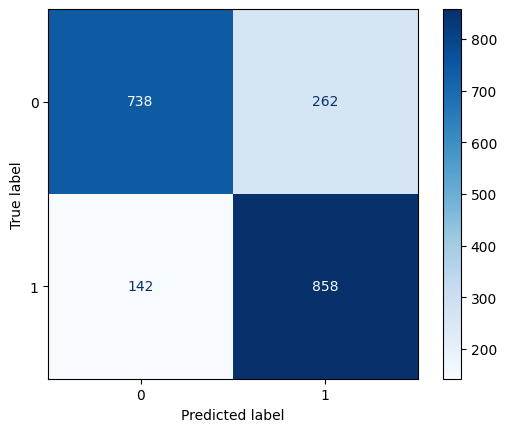

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1000
           1       0.77      0.86      0.81      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



Se puede observar que el accuracy logra hasta un 80%, por lo que de cada 10 imágenes de perros o gatos, 8 se predicen de manera correcta. Es una muy buena Red Neuronal Convolucional (CNN). Con esto queda concluido el ejercicio.

## Referencias

*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   Raschka, S., & Mirjalili, V. (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-learn, and TensorFlow.
*   SuperDataScience. (2025, June 9). Machine Learning A-Z: Download codes and datasets - SuperDataScience | Machine Learning | AI | Data Science Career | Analytics | Success. http://superdatascience.com/machine-learning
*   Vandeput, N. (2021). Data science for supply chain forecasting. de Gruyter.